In [1]:
import numpy as np

In [2]:
a=[1,3,5]
b=[2,4,6]
A=np.array(a)
B=np.array(b)

In [3]:
A+B

array([ 3,  7, 11])

In [5]:
print(A); type(A)

[1 3 5]


numpy.ndarray

In [7]:
J=np.array([[1,2,3],[4,5,6],[7,8,9]])
J

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [8]:
J.shape

(3, 3)

In [10]:
X=np.array([[1,2,3,4],[5,6,7,8]])
X

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [11]:
X.shape

(2, 4)

# Creation

In [13]:
import numpy as mp
import matplotlib.pyplot as plt

In [16]:
np.empty([3,2], dtype='int')

array([[         0, 1072168960],
       [         0, 1072168960],
       [         0,          0]])

In [24]:
np.empty([3,2],dtype='float')

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [20]:
np.zeros([4,2],dtype='int')

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [19]:
np.array([[0,0],[0,0],[0,0],[0,0]])

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [26]:
np.ones([2,3],dtype='int')

array([[1, 1, 1],
       [1, 1, 1]])

In [28]:
np.arange(1,5)

array([1, 2, 3, 4])

In [30]:
np.arange(1,15,3)

array([ 1,  4,  7, 10, 13])

In [35]:
np.linspace(1,13,5)

array([ 1.,  4.,  7., 10., 13.])

In [37]:
X=np.array([[0,2],[4,6],[8,10]])
X

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [38]:
X=np.array([[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]])
X

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [39]:
X.ndim

3

In [40]:
X.shape

(2, 2, 3)

In [41]:
X.dtype

dtype('int32')

In [42]:
X.astype(np.float64)

array([[[1., 2., 3.],
        [4., 5., 6.]],

       [[1., 2., 3.],
        [4., 5., 6.]]])

In [43]:
np.zeros_like(X)

array([[[0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0]]])

In [44]:
X*0

array([[[0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0]]])

data=np.random.normal(0,1,100)
=(평균, 분산, 데이터 수)

[ 0.72284509 -0.80847111 -0.53150299  1.12607902  0.88142694 -1.70556547
  0.33716919  0.59432505 -0.55574304  0.68813695  1.16767863 -1.24580282
 -0.45196928 -0.82911369  1.03438894 -0.74267533  0.72023416  0.63072972
  0.37951597 -0.426264    0.14190493 -1.01562085  0.52962388  0.45128806
 -0.56129109 -0.18816287 -1.51410653  0.17673887 -0.61305896 -0.74062256
 -0.24722054  0.51409308  0.61931709  0.12660484  0.46837567 -0.86774455
 -0.43822682 -0.54356819 -0.41054176  0.41422513 -0.00680512  2.27155773
 -0.45646239  0.05094612  0.65470689  0.379561    1.03495048 -1.57898226
 -0.63723242  1.83749286  0.4305302   0.88029169 -0.3243589  -1.86743268
  0.14530885 -1.78175655 -1.14618361  1.60605854  0.83247369  1.09209531
 -0.73531836  1.61607162 -0.88527545  0.59682823  0.26488154 -0.51163796
 -0.08211695  0.39045288  3.28471694  0.83210784 -0.82025836 -0.05268795
  1.23904181  0.01374743 -0.73391196  0.38356361 -0.53474584  2.0133653
 -1.08521481  0.11417052 -0.93428179 -0.94431131  0.

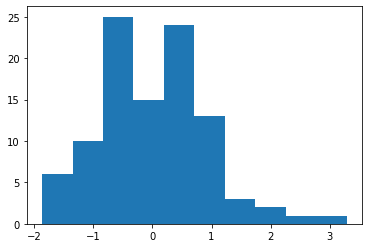

In [48]:
data=np.random.normal(0,1,100)
print(data)
plt.hist(data,bins=10)
plt.show()

In [46]:
data.ndim

1

In [47]:
data.shape

(100,)

# Manipulation

In [50]:
X=np.ones([2,3,4])
X

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [51]:
Y=X.reshape(2,2,-1)
Y

array([[[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]])

In [52]:
np.allclose(X.reshape(2,2,-1),Y)

True

In [54]:
a=np.random.randint(0,10,[2,3])
a

array([[6, 9, 1],
       [0, 7, 3]])

In [56]:
b=np.random.random([2,3])
b

array([[0.05053241, 0.5399795 , 0.92415877],
       [0.03642214, 0.08539443, 0.94084904]])

In [58]:
np.savez("test",a,b)

In [59]:
who

A	 B	 J	 X	 Y	 a	 b	 data	 mp	 
np	 plt	 


In [60]:
del a,b

In [61]:
who

A	 B	 J	 X	 Y	 data	 mp	 np	 plt	 



In [62]:
z=np.load("test.npz")
z.files

['arr_0', 'arr_1']

In [63]:
z['arr_0']

array([[6, 9, 1],
       [0, 7, 3]])

In [64]:
z['arr_1']

array([[0.05053241, 0.5399795 , 0.92415877],
       [0.03642214, 0.08539443, 0.94084904]])

# Inspecting

In [65]:
arr=np.random.random([5,2,3])
arr

array([[[0.33116029, 0.83022175, 0.86013061],
        [0.0300491 , 0.9623403 , 0.33500232]],

       [[0.65628705, 0.04375132, 0.17116688],
        [0.29561307, 0.31529808, 0.67104593]],

       [[0.19616403, 0.71278859, 0.86749892],
        [0.53717663, 0.34975382, 0.54513813]],

       [[0.82100399, 0.48251799, 0.55618006],
        [0.44969951, 0.0460477 , 0.82199483]],

       [[0.78008701, 0.06437279, 0.19295288],
        [0.24878841, 0.43352528, 0.75813135]]])

In [66]:
print(type(arr))
print(len(arr))
print(arr.shape)
print(arr.ndim)
print(arr.size)
print(arr.dtype)

<class 'numpy.ndarray'>
5
(5, 2, 3)
3
30
float64


# Operations

In [74]:
a=np.arange(1,10).reshape(3,3)
b=np.arange(9,0,-1).reshape(3,3)
print(a)
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [75]:
a==b

array([[False, False, False],
       [False,  True, False],
       [False, False, False]])

In [76]:
a>b

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

# Aggregate

In [78]:
a.sum()

45

In [79]:
np.sum(a)

45

In [81]:
a.sum(axis=0), np.sum(a,axis=0)

(array([12, 15, 18]), array([12, 15, 18]))

# Broadcasting

In [82]:
a=np.arange(1,25).reshape(6,4)
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24]])

In [83]:
a+100

array([[101, 102, 103, 104],
       [105, 106, 107, 108],
       [109, 110, 111, 112],
       [113, 114, 115, 116],
       [117, 118, 119, 120],
       [121, 122, 123, 124]])

In [86]:
b=np.arange(4)
b

array([0, 1, 2, 3])

In [87]:
a+b

array([[ 1,  3,  5,  7],
       [ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13, 15, 17, 19],
       [17, 19, 21, 23],
       [21, 23, 25, 27]])